In [ ]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install numpy==1.25.2
# !pip install matplotlib==3.7.1
# !pip install scikit-learn==1.2.2

In [8]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [9]:
# バージョンの確認
import matplotlib
import sklearn
print(np.__version__)
print(matplotlib.__version__)
print(sklearn.__version__)

1.25.2
3.7.1
1.2.2


In [10]:
# sin関数にノイズを追加して訓練データ(X,y)を作成
np.random.seed(seed=8) #乱数を固定
# [:, np.newaxis]は1次元配列を2次元配列に変換
X = np.random.uniform(0, 4, 15)[:, np.newaxis]
# flatten()は2次元配列を1次元配列に変換
y = np.sin(1/4 * 2 * np.pi * X ).flatten()+np.random.normal(0, 0.3, 15)

# 次数を指定
degree = 6

# 特徴量の多項式変換
poly = PolynomialFeatures(degree = degree, include_bias = False)
X_poly = poly.fit_transform(X)

In [17]:
# モデルの学習
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# 正則化の強さを指定
alpha=0.1

model = LinearRegression()
model2 = Ridge(alpha=alpha)

# 多項式変換した特徴量と正解を用いて学習
model.fit(X_poly, y)
model2.fit(X_poly, y)

Ridge(alpha=0.1)

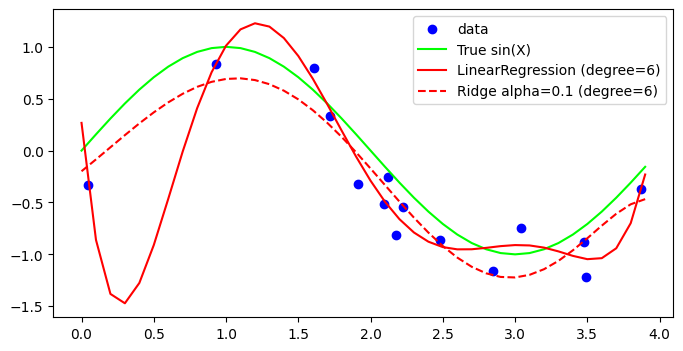

In [18]:
plt.figure(figsize=(8, 4)) #プロットのサイズ指定

# プロット用にデータX_pltを作成
X_plt = np.arange(0, 4, 0.1)[:, np.newaxis]
# 正解のプロット
y_true = np.sin(1/4 * 2 * np.pi * X_plt).flatten()
# 予測モデルのプロット
y_pred = model.predict(poly.transform(X_plt))
y_pred2 = model2.predict(poly.transform(X_plt))

# sin関数への正則ありとなしの線形回帰モデル
plt.scatter(X, y, color='blue', label='data')
plt.plot(X_plt, y_true, color='lime', linestyle='-' ,label='True sin(X)')
plt.plot(X_plt, y_pred, color='red', linestyle='-' ,label=f'LinearRegression (degree={degree})')
plt.plot(X_plt, y_pred2, color='red', linestyle='--' ,label=f'Ridge alpha={alpha} (degree={degree})')
plt.legend(loc='upper right')

plt.show()